# Chapter 10
# Unsupervised Learning
A set of statistical tools intended for the settings in which we have only a set of features $X_1, X_2,....,X_p$ measured on n observations.

Our goal is not prediction but finding interesting things about the measurements on $X_1, X_2,....,X_p$. 
1. __PCA__ :- PCA is used for data visualization or data pre processing before supervised techniques are applied.
2. __Clustering__ :- Broad class of methods for discovering unknown subgroups of data.

## Principal Component Analysis
PCA allows us to summarize data with a smaller number of representative variables that collectively explain most of the variability in the original set. We are finding the directions in feature space along which the original data are highly variable.

* PCA refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data.

__What are Principal Components?__

To visualize a dataset with n > 2 dimension is not possible. We wants to find a low-dimensional representation of the data that captures as much information as possible.

The idea is that each of the observation of size n lives in p-dimensional space but not all dimensions are equally important. Each dimension found by PCA is a linear combination of the p features.

First principal component is the normalized linear combination of the features
$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 +......+ \phi_{p1}X_p$$ that has the largest variance. By normalized, we mean $\sum_{j = 1}^{p}\phi_{j1}^2 = 1$.

$\phi's$ are called loadings for the first principal component. Together, the loadings make up the principal component loading vector, $\phi_1 = (\phi_{11},\phi_{21},....,\phi_{p1})^T$. We constraints the loading, so that their sum of squares is equal to one. Since otherwise setting these elements to a large absolute value will result in high variance. 

First Component solves the optimization problem $$maximize_{\phi_{11},\phi_{21},....,\phi_{p1}}{\frac{1}{n}\sum_{i=1}^n(\sum_{j=1}^p\phi_{j1}x_{ij})^2}$$ subject to $\sum_{j = 1}^{p}\phi_{j1}^2 = 1$.

Since $\frac{1}{n}\sum x_{ij} = 0$ (normalized), the average of the $z_{11},z_{21},....,z_{n1}$ will be zero as well. Hence, the objective we are maximizing is just the sample variance of the n values of $z_{i1}$. 

$z_{11},z_{21},....,z_{n1}$ are score of first principal component.The optimization problem is solved via an eigen decomposition.

* After the first principal component $Z_1$ of the feature has been determined, we can find second principal component $Z_2$. $Z_2$ is a linear combination of $X_1, X_2,....,X_p$ that has miximal variance out of all linear combination that are uncorrelated with $Z_1$.
$$Z_{i2} = \phi_{12}X_{i1} + \phi_{22}X_{i2} +......+ \phi_{p2}X_{ip}$$
$\phi_2$ = Second principal component loading vector. $\phi_2 = (\phi_{12},\phi_{22},....,\phi_{p2})^T$ and $\phi_1$ and $\phi_2$ are orthogonal vectors.

Find $\phi_2$ is the same optimization problem as $\phi_1$ with additional constraints that $\phi_2$ is orthogonal to $\phi_1$. We can use these pricipal components to produce low-dimensional views of the data. 

In [47]:
import numpy as np
import pandas as pd
from pca import pca 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [27]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/USArrests.csv"
Arrests = pd.read_csv(url, index_col = 0)
X = scale(np.array(Arrests))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


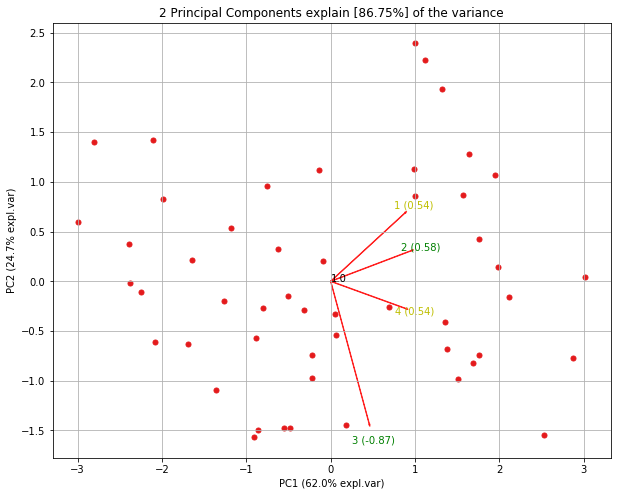

In [28]:
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
fig, ax = pca2comp.biplot(n_feat=4, legend = False)
plt.show()

The 4 variables in above plots are "Murder", "Assault", "UrbanPop", "Rape". In above plot, loading for "Rape" in first principal component is 0.54. Also, we can see that "UrbanPop" have a small loading in first pricipal component but a high loading in second principal component. The above plot is called a __biplot__

#### Another Interpretation of Principal Components
Principal components provide low-dimensional linear surfaces that are closest to the observations.
* First principal component loading vector is the line in p-dimensional space that is closest to the n observations. The notion of principal components as the dimensions that are closest to the n observations extends beyond just the first principal component.

* Together first M principal component score vectors and the first M principal component loading vector provide the best M - dimensional approximation to the ith observation $x_{ij}$. We can write that as $$x_{ij} \approx \sum_{m = 1}^M z_{im} \phi_{jm}$$.
* When M = p, representation is exact and as M decrease, represenatation becomes blurry.

### More on PCA
__Scaling the variables :-__

Variables should be centered. Results obtained will depend on weather the variables have been individually scaled. If scaling is not performed, the variable that have high variance will result in very large loading for those variables and the variables with high loading will have highest weight.


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


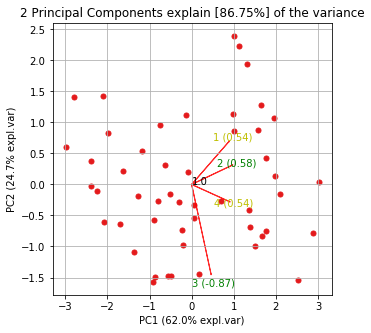

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


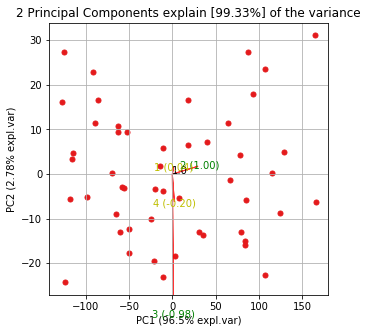

In [45]:
X = scale(np.array(Arrests))
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
ax1 = pca2comp.biplot(n_feat=4, legend = False, figsize = (5,5))
X = np.array(Arrests)
pca2comp = pca(n_components = 2)
results = pca2comp.fit_transform(X)
ax2 = pca2comp.biplot(n_feat=4, legend = False, figsize = (5,5))

The above 2 plots shows the effect of scaling the variables. The first plot is PCA with scaled variables and second plot is PCA with original variables.The second plot shows that the highest loading is assigned to "Assault" variable only because it has a large scale. The other variables do not have a high loading but in the after scaling the variables in first plot we can see that 3 variables have similar loading in first principal component.

__Uniqueness of Principal Components :-__

Each principal component loading vector and score vectors are unique upto sign flip. Flipping of sign has no effect as the directions does not change.

__The proportion of variance explained :-__

We also like to know how much of the information in a given dataset is lost. How much of the variance is not contained in the first few principal components?

__Proportion of variance Explained (PVE) by each Principal component__

Total variance present in a dataset $$\sum_{j = 1}^p Var(X_j) = \sum_{j = 1}^p \frac{1}{n} \sum_{i = 1}^nx_{ij}^2$$
and the variance explained by the mth principal component $$\frac{1}{n}\sum_{i=1}^n z_{im}^2 = \frac{1}{n}\sum_{i=1}^n (\sum_{j = 1}^p \phi_{jm} x_{ij})^2$$
PVE of the mth principal component $$\frac{\sum_{i=1}^n (\sum_{j = 1}^p \phi_{jm} x_{ij})^2}{\sum_{j = 1}^p\sum_{i = 1}^nx_{ij}^2}$$

To get the PVE for the first M principal component, we can simply sum over each of the first M PVE. In total, we have min(n-1,p) principal components and their PVEs sum to one.

__Deciding How many Principal Components to use :-__
We would like to use smallest number of Principal component required. One way to do it is to plot PVEs for different no. of principal component and then looking for a point at which the proportion of variance explained by each of the subsequent principal component drops off.

* If first few principal component do not show any interesting pattern, then further principal component are unlikely to be of interest and the inverse is also true. 

* In supervised analysis, we can decide on no. of components based on which one results in minimum error.
* Use of principal component (M < p) rather than the original p variables will also result in less noisy data (data set is concentrated in its first few principal components).

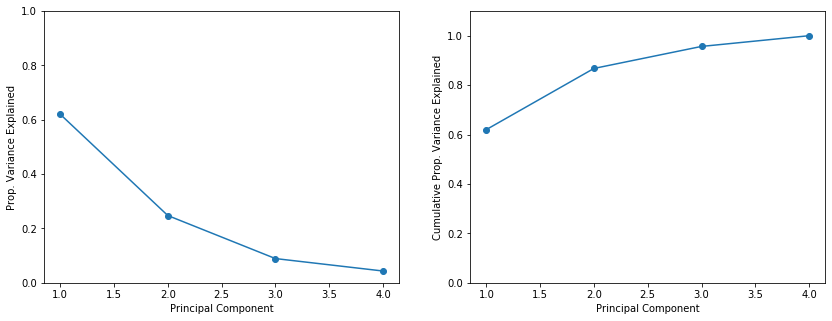

In [64]:
X = scale(np.array(Arrests))
pca4comp = PCA(n_components = 4).fit(X)
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (14,5))
ax1.plot(list(range(1,5)),pca4comp.explained_variance_ratio_, marker = "o")
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Prop. Variance Explained')
ax1.set_ylim(0,1)

ax2.plot(list(range(1,5)),pca4comp.explained_variance_ratio_.cumsum(), marker = "o")
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Prop. Variance Explained')
ax2.set_ylim(0,1.1)

plt.show()